In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV

## Data Preprocessing and EDA and Visualization

In [2]:
## excel
df=pd.read_excel('EastWestAirlines.xlsx')
df.head()

,East-West Airlines is trying to learn more about its customers. Key issues are their,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"flying patterns, earning and use of frequent f...",NaN,NaN,NaN,NaN
1,card. The task is to identify customer segmen...,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,Source: Based upon real business data; company...,NaN,NaN,NaN,NaN


In [3]:
## pandas to read the sheet named 'data' from the Excel file
df = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
df.shape

(3999, 12)

In [6]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [7]:
features = df.drop(columns='ID#')

In [8]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
df1 = pd.DataFrame(std.fit_transform(features),columns=features.columns)

In [9]:
df1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


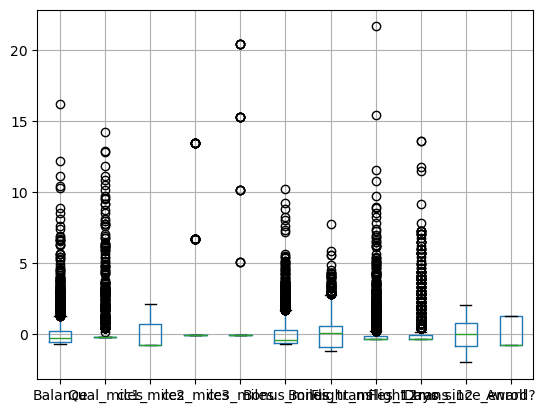

In [10]:
df1.boxplot()
plt.show()

In [11]:
# Outliers capping
def outlier_capping(df,col):
    for col in df.columns:
        Q1=df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1-1.5*IQR
        upper_bound = Q3+1.5*IQR
        df[col] = df[col].apply(lambda x:lower_bound if x<lower_bound else upper_bound if x>upper_bound else x)
outlier_capping(df1,df1.columns)

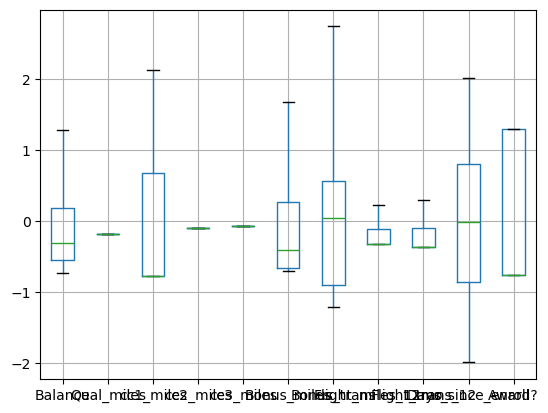

In [12]:
df1.boxplot()
plt.show()

### K-MEANS CLUSTERING

In [13]:
kmeans=KMeans(n_clusters=3)
cluster=kmeans.fit(features)

In [14]:
np.unique(cluster.labels_)

array([0, 1, 2])

In [15]:
kmeans.inertia_

11832997239886.361

In [16]:
silhouette_score(features,cluster.labels_)

0.6253233493644161

In [17]:
features['cluster']= cluster.labels_

In [18]:
features[features.cluster==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
5,16420,0,1,1,1,0,0,0,0,6942,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [19]:
features.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?', 'cluster'],
      dtype='object')

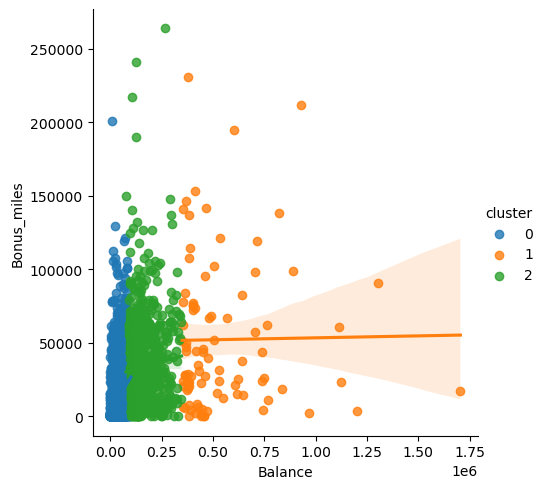

In [20]:
sns.lmplot(data=features, x='Balance', y='Bonus_miles', hue='cluster')
plt.show();

In [21]:
cluster.cluster_centers_

array([[3.57421773e+04, 1.02082790e+02, 1.76923077e+00, 1.01531943e+00,
        1.00717080e+00, 1.16264309e+04, 9.84843546e+00, 3.05396023e+02,
        9.15906128e-01, 3.84986636e+03, 3.29204694e-01],
       [5.40537308e+05, 4.85494505e+02, 3.20879121e+00, 1.03296703e+00,
        1.03296703e+00, 5.21480879e+04, 2.03516484e+01, 1.72919780e+03,
        5.61538462e+00, 6.17261538e+03, 7.69230769e-01],
       [1.61292636e+05, 2.60647619e+02, 2.99523810e+00, 1.00952381e+00,
        1.02857143e+00, 3.35081833e+04, 1.70583333e+01, 8.87441667e+02,
        2.58571429e+00, 4.87740595e+03, 4.77380952e-01]])

In [22]:
kmeans.inertia_

11832997239886.361

## Elbow Method

In [23]:
inertia=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)
print(inertia)

[42961820049247.06, 20840064183412.77, 11790495894299.168, 7549750702852.395, 5897444643201.492, 4797721289030.346, 3700363835190.299, 3272603173128.814, 3022009400442.503, 2689490102910.601]


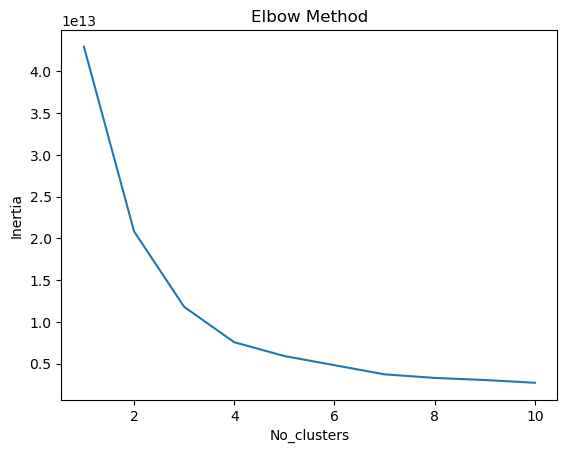

In [24]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),inertia)
plt.xlabel('No_clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show();

## Hierarchial clustering or Agglomarative clustering

In [25]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [26]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [27]:
features = df.drop(columns='ID#')

In [28]:
features.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


## Dendrogram 

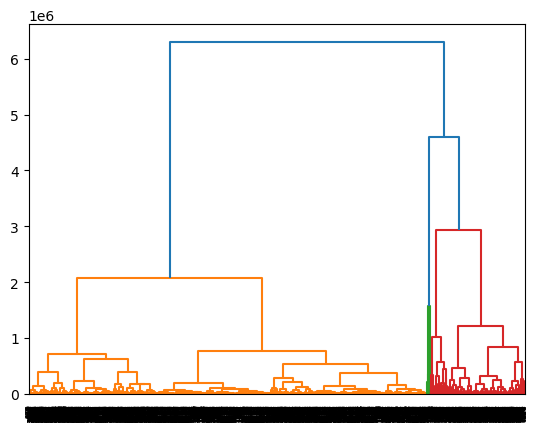

In [29]:
dendrogram=sch.dendrogram(sch.linkage(features,method='ward'))
plt.show();

In [30]:
agg=AgglomerativeClustering(n_clusters=2,linkage='ward')

In [31]:
cluster=agg.fit(features)

In [32]:
silhouette_score(features,cluster.labels_)

0.6507953123140028

### DBSCAN --- Density based spatial clustering Associated with Noise

In [33]:
from sklearn.cluster import DBSCAN

In [37]:
eps= np.arange(0.1,0.7,0.1)
min_node= range(1,11)
epsilon = []
minimum_nodes = []
score = []
for i in eps:
    for j in min_node:
        model = DBSCAN(eps=i,min_samples=j)
        clusters = model.fit(df1)
        epsilon.append(i)
        minimum_nodes.append(j)
        score.append(silhouette_score(df1,clusters.labels_))

In [39]:
a = pd.DataFrame({'Epsilon': epsilon,'min_no_nodes': minimum_nodes,'Silhouette_score': score})
a

,Epsilon,min_no_nodes,Silhouette_score
0,0.1,1,-0.020601
1,0.1,2,-0.517417
2,0.1,3,-0.421154
3,0.1,4,-0.258873
4,0.1,5,-0.250166
5,0.1,6,-0.253864
6,0.1,7,-0.214339
7,0.1,8,-0.210788
8,0.1,9,-0.212996
9,0.1,10,-0.207403


In [43]:
max_score=a.iloc[:,2].max()
max_score

0.04226830352701864

In [44]:
a[a['Silhouette_score']==max_score]

,Epsilon,min_no_nodes,Silhouette_score
53,0.6,4,0.042268


In [62]:
labels=DBSCAN(eps=0.2,min_samples=12).fit(features).labels_
np.unique(labels)

array([-1], dtype=int64)

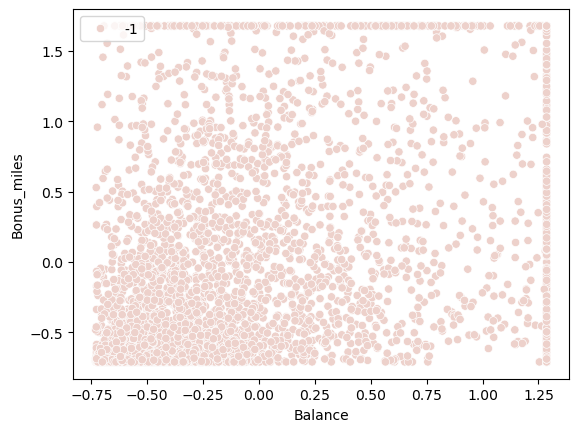

In [63]:
sns.scatterplot(data=df1,x='Balance',y='Bonus_miles',hue=labels)
plt.show();